Mature estates : 
['Clementi', 'Bukit Merah', 'Ang Mo Kio', 'Kallang / Whampoa', 'Pasir Ris', 'Geylang', 'Bishan', 'Tampines', 'Toa Payoh', 'Bedok', 'Queenstown', 'Serangoon']
Non Mature estates : 
['Punggol', 'Bukit Batok', 'Hougang', 'Bukit Panjang', 'Choa Chu Kang', 'Woodlands', 'Sengkang', 'Sembawang', 'Yishun', 'Jurong East', 'Jurong West']
['Clementi', 'Bukit Merah', 'Ang Mo Kio', 'Kallang / Whampoa', 'Pasir Ris', 'Geylang', 'Bishan', 'Tampines', 'Toa Payoh', 'Bedok', 'Queenstown', 'Serangoon', 'Punggol', 'Bukit Batok', 'Hougang', 'Bukit Panjang', 'Choa Chu Kang', 'Woodlands', 'Sengkang', 'Sembawang', 'Yishun', 'Jurong East', 'Jurong West']
medianPrice [('2007-Q2', 'Ang Mo Kio', '1-room',      0.)
 ('2007-Q2', 'Ang Mo Kio', '2-room',      0.)
 ('2007-Q2', 'Ang Mo Kio', '3-room', 172000.) ...
 ('2018-Q3', 'Yishun', '4-room', 350000.)
 ('2018-Q3', 'Yishun', '5-room', 440000.)
 ('2018-Q3', 'Yishun', 'Executive',      0.)]
town_region_dict {'Clementi': 'Mature', 'Bukit Merah': 'Matur

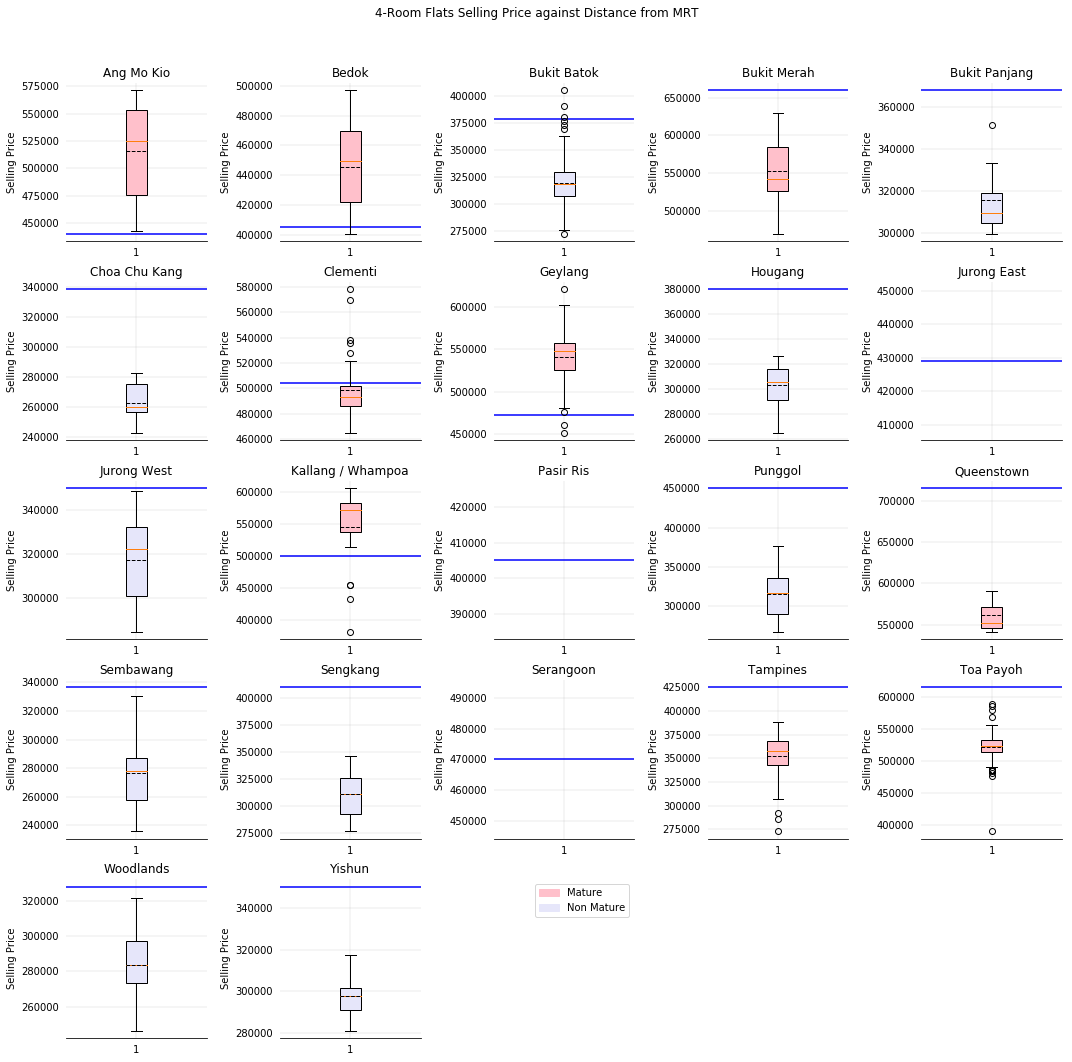

In [4]:
# Comparing median prices of Nov 2018 4-Room Sales of Balance Flats as compared to 2018-Q3 median flat prices
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as mpatches
import parseUnitDetails
os.getcwd()
# TO get a boxplot to see the number of 4-Rooms and number of 5-Room flats available for Nov 2018 Sale of balance flats

unitDetails = parseUnitDetails.getUnitDetails()



# Get selling prices across towns for 4-Room flats    

labels = np.array(['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun'])
#print(data)
#print(len(data))
#print(len(labels))


########## short cut for the above rb 
allTowns = ['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun']

output = []
for town in allTowns:
    townPrice = []
    #print('top', town)
    for unit in unitDetails:
        if unit['rmType']=='4-Room':
            if unit['repurchasedFlat']=='':
                if unit['leaseLessThan60Yrs']=='':
                    if unit['town']==town:
                        townPrice1 = unit['sellingPrice'] 
                        townPrice.append(townPrice1)
    output.append(townPrice)


########################################################

## Mature and Non Mature estates
yMature,nMature,keys,values = parseUnitDetails.getMaturityColour()

##########################################################################
# Import median resale flat price data set from data.gov.sg
medianPrice = np.genfromtxt("median-resale-pricesby-town-and-flat-type.csv", delimiter=",",skip_header=1,
                dtype=[('quarter','U8'),('town','U50'),('flat_type','U20'),('price','f8')],
                missing_values=['na','-',''],filling_values=0, comments='!')
print('medianPrice',medianPrice)

midPrice_town = []
midPrice_price=[]
for mid in medianPrice:
    if mid['quarter']=='2018-Q3':
        if mid['flat_type']=='4-room':
            midPrice_town.append(mid['town'])
            midPrice_price.append(mid['price']) 
midTownNPrice = dict(zip(midPrice_town,midPrice_price))
#print(midTownNPrice)
##############################################################################
# Making Subplots

# change fill color
region_color_dict = {
    "Mature": "pink",
    "Non Mature": "lavender"
}
town_region_dict= dict(zip(keys,values))  #### dict used this way diff
print('town_region_dict', town_region_dict)
print('region_color_dict', region_color_dict)

# make subplots from my above plots
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=False, sharey=False, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist] 


for town in labels:     
    ax = axes_list.pop(0) # get the nth axis object    
    # to do boxplots
    thisTownPrices = output.pop(0) # get top of the list
    bp = ax.boxplot(thisTownPrices, patch_artist=True,meanprops = dict(color='black'),showmeans=True, meanline=True)
    #(estatesMaturityCon)
    thisTownIsMature = town_region_dict[town]
    thisTownColor = region_color_dict[thisTownIsMature]
    #print('currentTown:', town, ' isMature: ', thisTownIsMature, ' color: ', thisTownColor)
    
    # change color depending on mature status
    bp['boxes'][0].set_facecolor(thisTownColor) # 0 since only 1 box plot
    
    # add hline
    thisTownMidResalePrice = midTownNPrice[town] #town is key
    #print(town,thisTownMidResalePrice)
    ax.hlines(thisTownMidResalePrice,0,2, 'b') # boxplot x is '1', hline requires xmin and xmax

    ax.set_title(town)
    ax.tick_params(
        which='both',
        bottom=False,
        left=False,
        right=False,
        top=False
    )
    
    ax.grid(linewidth=0.25)
    #ax.set_xlim((1950, 2020))
    #ax.set_xticks(range(0,2800, 1000))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(linewidth=0.25)
    #ax.set_xlim((0,3000))
    ax.set_ylabel("Selling Price")
    fig.suptitle('4-Room Flats Selling Price against Distance from MRT')
    

## plotting legend
pink_patch = mpatches.Patch(color='pink', label='Mature')
lavender_patch = mpatches.Patch(color='lavender', label='Non Mature')

#legend on the next subplot
ax = axes_list.pop(0)
ax.legend(handles=[pink_patch,lavender_patch],loc='upper right')

#hide all axis/lines
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
    
    
    
for ax in axes_list:
        ax.remove()  # remove those spaecs without subplots


    #ax.spines['left'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)

plt.tight_layout()  
fig.subplots_adjust(top=0.91)
plt.show()    
print()




## conclusion : resale price thought to be higher than SALE OF BALANCE. Resale price lower than median of SBF for some matured estates
# link: https://www.hdb.gov.sg/cs/infoweb/hdbspeaks/differing-prices-for-bto-flats-in-the-same-town
# https://dollarsandsense.sg/sales-balance-flats-vs-re-offer-balance-flats-whats-difference/

## Some Q3 have values coz it was based on Q3 but our SBF is based on Nov 2018
# have to see other info to make better judgement why AMK and some others is more expensive for median over resale









Mature estates : 
['Clementi', 'Bukit Merah', 'Ang Mo Kio', 'Kallang / Whampoa', 'Pasir Ris', 'Geylang', 'Bishan', 'Tampines', 'Toa Payoh', 'Bedok', 'Queenstown', 'Serangoon']
Non Mature estates : 
['Punggol', 'Bukit Batok', 'Hougang', 'Bukit Panjang', 'Choa Chu Kang', 'Woodlands', 'Sengkang', 'Sembawang', 'Yishun', 'Jurong East', 'Jurong West']
['Clementi', 'Bukit Merah', 'Ang Mo Kio', 'Kallang / Whampoa', 'Pasir Ris', 'Geylang', 'Bishan', 'Tampines', 'Toa Payoh', 'Bedok', 'Queenstown', 'Serangoon', 'Punggol', 'Bukit Batok', 'Hougang', 'Bukit Panjang', 'Choa Chu Kang', 'Woodlands', 'Sengkang', 'Sembawang', 'Yishun', 'Jurong East', 'Jurong West']
medianPrice [('2007-Q2', 'Ang Mo Kio', '1-room',      0.)
 ('2007-Q2', 'Ang Mo Kio', '2-room',      0.)
 ('2007-Q2', 'Ang Mo Kio', '3-room', 172000.) ...
 ('2018-Q3', 'Yishun', '4-room', 350000.)
 ('2018-Q3', 'Yishun', '5-room', 440000.)
 ('2018-Q3', 'Yishun', 'Executive',      0.)]
town_region_dict {'Clementi': 'Mature', 'Bukit Merah': 'Matur

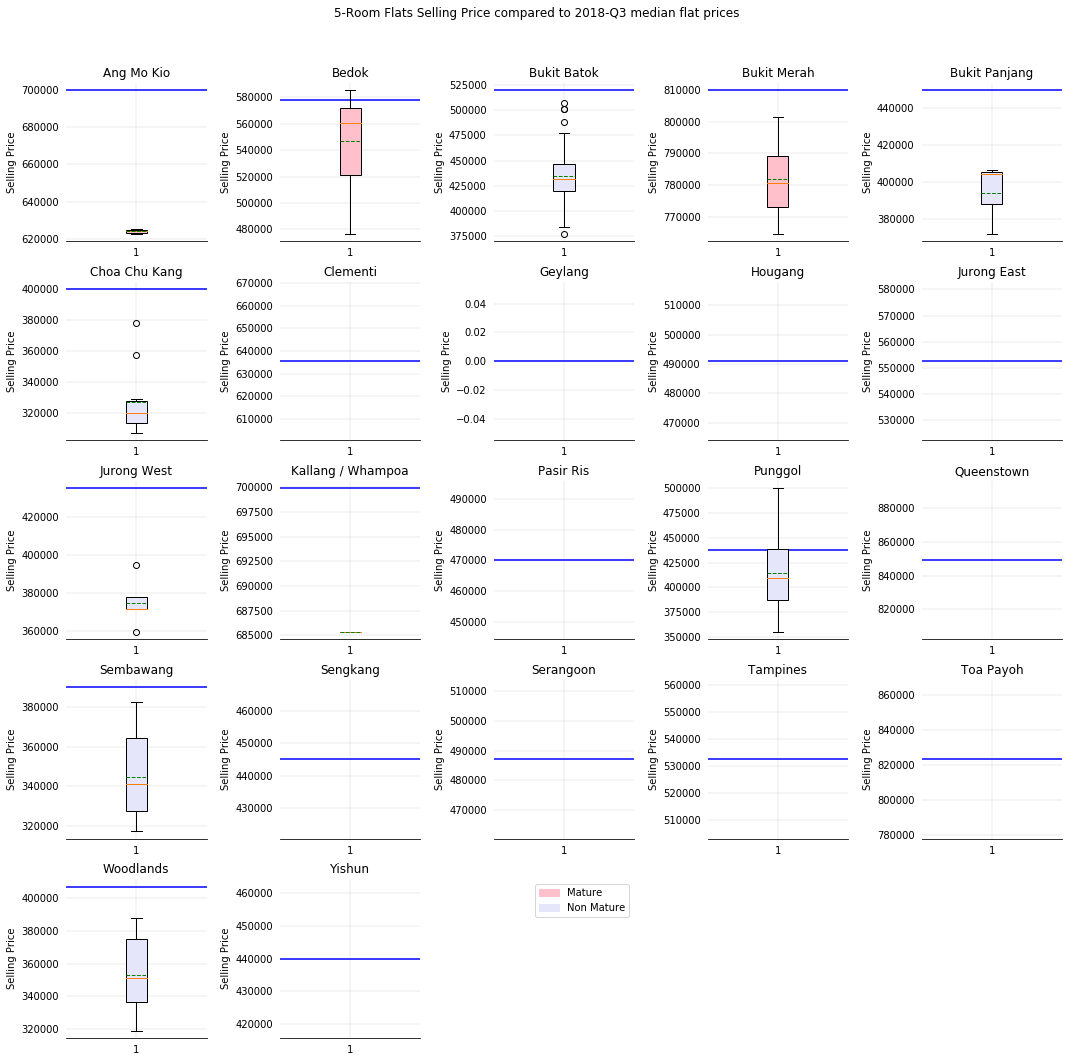

In [5]:
# Comparing median prices of Nov 2018 5-Room Sales of Balance Flats as compared to 2018-Q3 median flat prices
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as mpatches
import parseUnitDetails
os.getcwd()
# TO get a boxplot to see price of 5-Room flats available for Nov 2018 Sale of balance flats

# import csv data file
unitDetails = parseUnitDetails.getUnitDetails()




# Get selling prices across towns for 5-Room flats    


labels = np.array(['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun'])



allTowns = ['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun']

output = []
for town in allTowns:
    townPrice = []
    #print('top', town)
    for unit in unitDetails:
        if unit['rmType']=='5-Room':
            if unit['repurchasedFlat']=='':
                if unit['leaseLessThan60Yrs']=='':
                    if unit['town']==town:
                        townPrice1 = unit['sellingPrice'] 
                        townPrice.append(townPrice1)
    output.append(townPrice)

########################################################

## Mature and Non Mature estates
yMature,nMature,keys,values = parseUnitDetails.getMaturityColour()

##########################################################################
# Import median resale flat price data set from data.gov.sg
medianPrice = np.genfromtxt("median-resale-pricesby-town-and-flat-type.csv", delimiter=",",skip_header=1,
                dtype=[('quarter','U8'),('town','U50'),('flat_type','U20'),('price','f8')],
                missing_values=['na','-',''],filling_values=0, comments='!')
print('medianPrice',medianPrice)

midPrice_town = []
midPrice_price=[]
for mid in medianPrice:
    if mid['quarter']=='2018-Q3':
        if mid['flat_type']=='5-room':
            midPrice_town.append(mid['town'])
            midPrice_price.append(mid['price']) 
midTownNPrice = dict(zip(midPrice_town,midPrice_price))
#print(midTownNPrice)
##############################################################################
# Making Subplots

# change fill color
region_color_dict = {
    "Mature": "pink",
    "Non Mature": "lavender"
}
town_region_dict= dict(zip(keys,values))  #### dict used this way diff
print('town_region_dict', town_region_dict)
print('region_color_dict', region_color_dict)

# make subplots from my above plots
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=False, sharey=False, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist] 

for town in labels: 
    ax = axes_list.pop(0) # get the nth axis object
    
    # to do boxplots
    thisTownPrices = output.pop(0) # get top of the list
    bp = ax.boxplot(thisTownPrices, patch_artist=True, meanprops = dict(color='green'),showmeans=True, meanline=True)
    #(estatesMaturityCon)
    thisTownIsMature = town_region_dict[town]
    thisTownColor = region_color_dict[thisTownIsMature]
    #print('currentTown:', town, ' isMature: ', thisTownIsMature, ' color: ', thisTownColor)
    
    # change color depending on mature status
    #print(bp['boxes'])
    bp['boxes'][0].set_facecolor(thisTownColor) # 0 since only 1 box plot
    
    # add hline
    thisTownMidResalePrice = midTownNPrice[town] #town is key
    #print(town,thisTownMidResalePrice)
    ax.hlines(thisTownMidResalePrice,0,2, 'b') # boxplot x is '1', hline requires xmin and xmax

    ax.set_title(town)
    ax.tick_params(
        which='both',
        bottom=False,
        left=False,
        right=False,
        top=False
    )
    
    ax.grid(linewidth=0.25)
    #ax.set_xlim((1950, 2020))
    #ax.set_xticks(range(0,2800, 1000))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(linewidth=0.25)
    #ax.set_xlim((0,3000))
    ax.set_ylabel("Selling Price")
    fig.suptitle('5-Room Flats Selling Price compared to 2018-Q3 median flat prices')
    
    
## plotting legend
pink_patch = mpatches.Patch(color='pink', label='Mature')
lavender_patch = mpatches.Patch(color='lavender', label='Non Mature')

#legend on the next subplot
ax = axes_list.pop(0)
ax.legend(handles=[pink_patch,lavender_patch],loc='upper right')

#hide all axis/lines
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
    
for ax in axes_list:
        ax.remove()  # remove those spaecs without subplots


plt.tight_layout()  
fig.subplots_adjust(top=0.91)
plt.show()    
print()




## conclusion : resale price thought to be higher than SALE OF BALANCE. Resale price lower than median of SBF for some matured estates
# link: https://www.hdb.gov.sg/cs/infoweb/hdbspeaks/differing-prices-for-bto-flats-in-the-same-town
# https://dollarsandsense.sg/sales-balance-flats-vs-re-offer-balance-flats-whats-difference/

## Some Q3 have values coz it was based on Q3 but our SBF is based on Nov 2018






